In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Database connection
DB = './Database/stock_db.db'
conn = sqlite3.connect(DB)
print("Connected to SQLite")

Connected to SQLite


In [3]:
# Creating a cursor object
cur = conn.cursor()

# Execute the query
cur.execute('SELECT * FROM rendimiento_diario_por_accion')

# Fetch all rows
rows = cur.fetchall()

# Fetch column names from the cursor description
columns = [desc[0] for desc in cur.description]


In [4]:
rendimiento_diario_por_accion = pd.DataFrame(rows, columns=columns)

In [5]:
rendimiento_diario_por_accion

,Date,Empresa,Close,Close_anterior,Rendimiento_Diario
0,2019-05-28,Alphabet,56.978001,NaN,NaN
1,2019-05-29,Alphabet,55.997002,56.978001,-1.72
2,2019-05-30,Alphabet,56.070499,55.997002,0.13
3,2019-05-31,Alphabet,55.325001,56.070499,-1.33
4,2019-06-03,Alphabet,51.937000,55.325001,-6.12
...,...,...,...,...,...
6290,2024-05-20,Tesla,174.949997,177.460007,-1.41
6291,2024-05-21,Tesla,186.600006,174.949997,6.66
6292,2024-05-22,Tesla,180.110001,186.600006,-3.48
6293,2024-05-23,Tesla,173.740005,180.110001,-3.54


<Axes: title={'center': 'Rendimiento_Diario'}, xlabel='Empresa'>

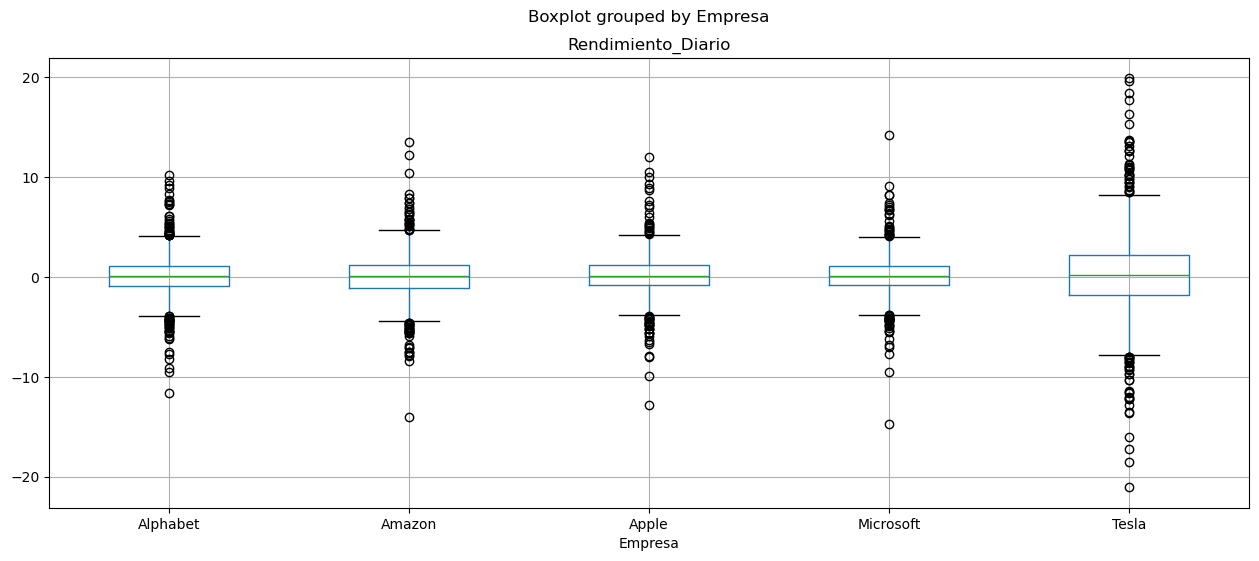

In [6]:
rendimiento_diario_por_accion.boxplot(column='Rendimiento_Diario', by='Empresa', figsize=(15, 6))

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_35902/1001631460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Empresa', y='Rendimiento_Diario', data=rendimiento_diario_por_accion, palette='bright')


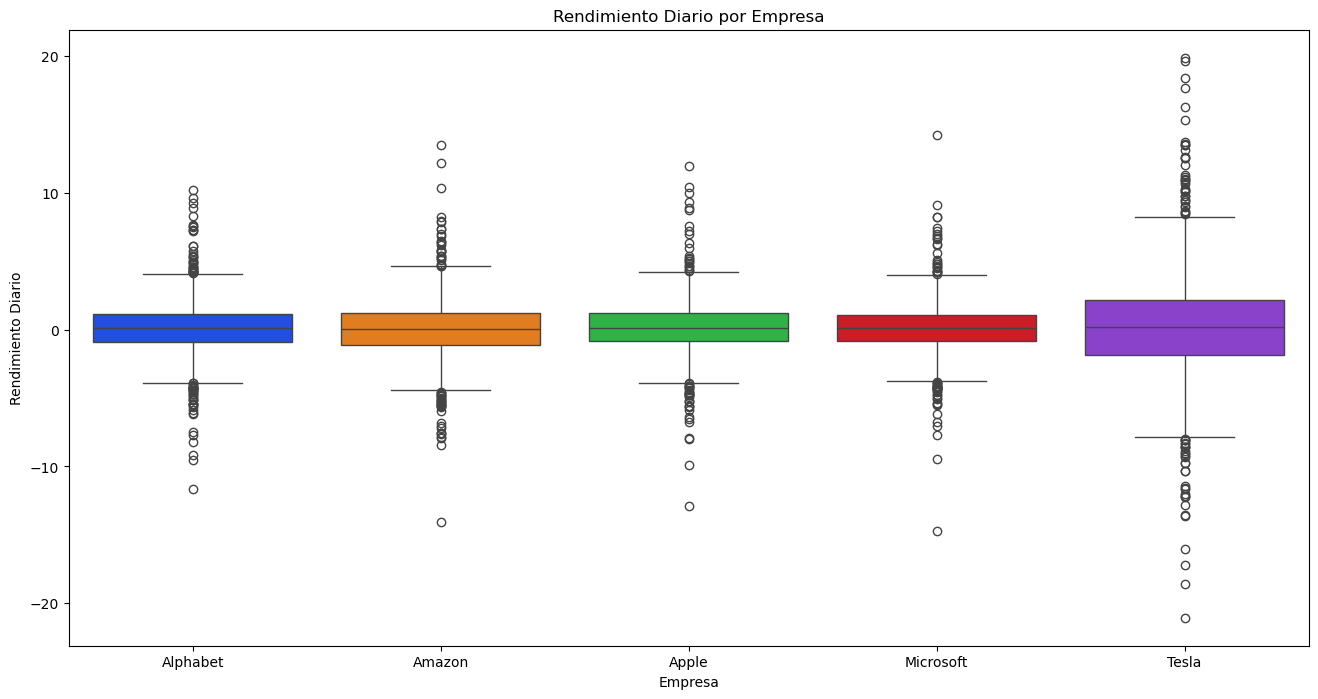

In [30]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Empresa', y='Rendimiento_Diario', data=rendimiento_diario_por_accion, palette='bright')
plt.grid(False)
plt.xlabel('Empresa')
plt.ylabel('Rendimiento Diario')
plt.title('Rendimiento Diario por Empresa')
plt.show()
